https://en.wikipedia.org/wiki/Poisson_distribution

I do not understand what the teacher asks for.

https://www.tutorialspoint.com/statistics/cumulative_poisson_distribution.htm

In [1]:
from math import factorial
import random as rd
import numpy as np
import matplotlib.pyplot as plt

Help from Matthew: Break the 400 seconds into small pieces delta t. For each of these small time units, compute the probability that an event occurs (see beginning of lecture 2/24).

$$P_0 = e^{-\lambda T}$$

where $P_0$ is the probability that no interactions occur between $t$ and $t+T$

The process can be simulated by generating a uniformly distributed random value between 0 and 1 and comparing it to the probability threshold. Repeat this process for all the delta t steps and sum all the n(t) events. The result should be consistent with the poisson process.

Parts d and e are tu run many such simulations and analyze the results.

In [2]:
# Initializing functions

def P_0(T, lamb=0.2):
    return np.exp(-lamb*T)

def comparison(p0):
    indicator = False
    if p0 < rd.random():
        indicator = True
    return indicator

In [3]:
# Part c
n = 0
times = np.arange(0, 400.01, 0.1)
nt = np.zeros(len(times)-1)

for i in range(len(times)-1):
    
    p0 = P_0(times[i+1]-times[i])
    
    if comparison(p0):
        n+=1
    nt[i] = n
    
print(n)

65


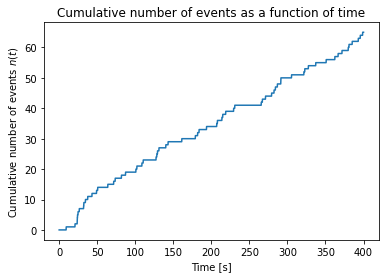

In [4]:
plt.plot(times[1:], nt)
plt.xlabel("Time [s]")
plt.ylabel(u"Cumulative number of events $n(t)$")
plt.title("Cumulative number of events as a function of time")
plt.show()

In [5]:
# d) Determine the mean and CV by running multiple times
realizations = 1000

times = np.arange(0, 400.01, 0.1)
n_s = np.zeros(realizations)

for k in range(realizations):
    n = 0

    for i in range(len(times)-1):

        p0 = P_0(times[i+1]-times[i])

        if comparison(p0):
            n+=1
    n_s[k] = n
    
print("Mean = ",np.mean(n_s))
print("Coefficient of variation CV = ", np.std(n_s)/np.mean(n_s))

Mean =  78.92
Coefficient of variation CV =  0.11262683016149684


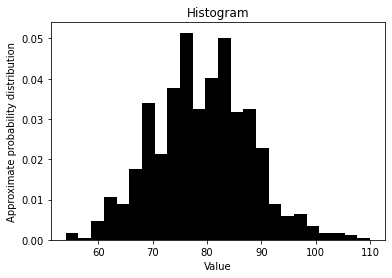

In [6]:
# e) Generate histogram

# Histogram: Number of times a single value was achieved
plt.hist(n_s, bins='auto', density=True, color='black', rwidth=1, label = "simulation")
# approximate probability distribution of # of events that occur in time T.

# plt.hist(n_s, bins='auto', color='black', rwidth=1, label = "Poisson distribution")
plt.xlabel("Value")
plt.ylabel(u"Approximate probability distribution") # Normalized Frequency
plt.title("Histogram")
plt.show()

$$\frac{(\lambda T)^N}{N!}e^{-\lambda T}$$

In [7]:
def poisson(n, t, lamb=0.2):
    return (((lamb*t)**n)/factorial(n))*np.exp(-lamb*t)

In [8]:
y = [poisson(1,times[i]) for i in range(len(times))]

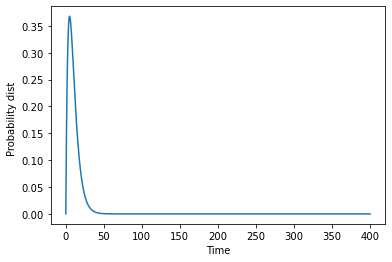

In [9]:
plt.plot(times, y)
plt.xlabel("Time")
plt.ylabel("Probability dist  ")
plt.show()